In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
new_model = True

if new_model:
    mnist = tf.keras.datasets.mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = tf.keras.utils.normalize(X_train, axis=1)
    X_test = tf.keras.utils.normalize(X_test, axis=1)

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    model.fit(X_train, y_train, epochs = 3)
    
    value_loss, value_acc = model.evaluate(X_test, y_test)
    print(value_loss)
    print(value_acc)

    model.save('handwritten.keras')

else:
    model = tf.keras.models.load_model('handwritten.keras')

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - accuracy: 0.8657 - loss: 0.4673
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9662 - loss: 0.1127
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9771 - loss: 0.0712
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9691 - loss: 0.1059
0.09313195943832397
0.9726999998092651


The number is a 7


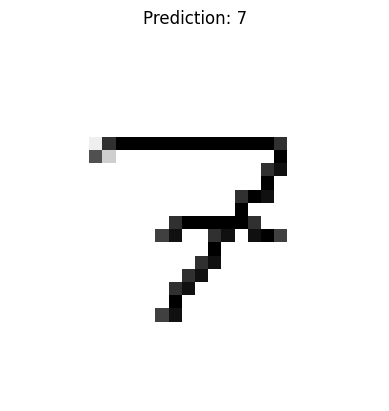

The number is a 2


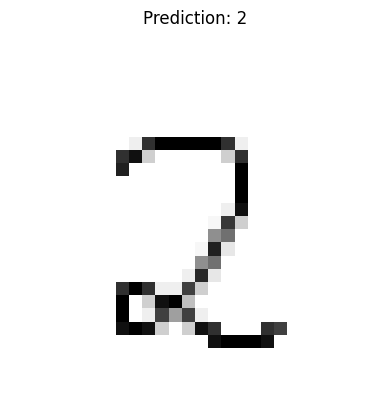

The number is a 9


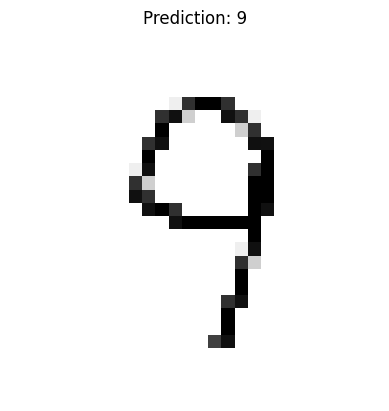

The number is a 8


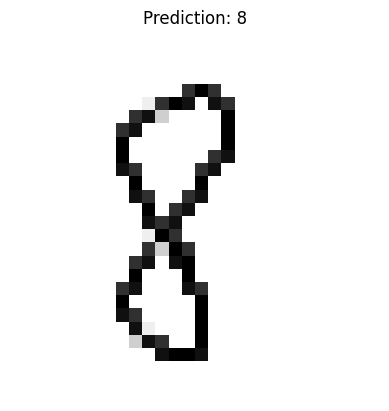

The number is a 6


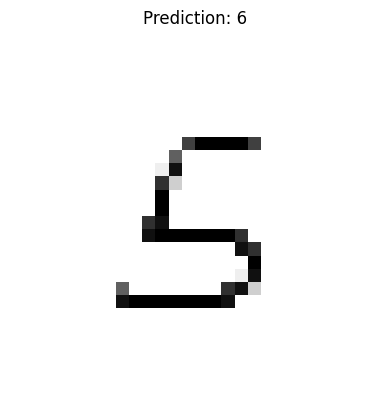

The number is a 6


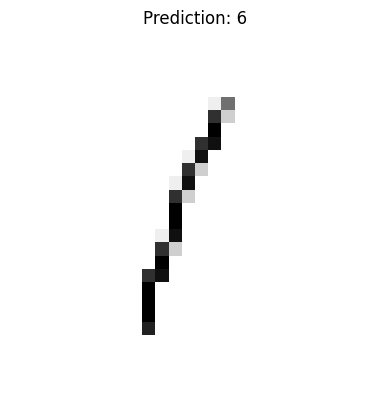

The number is a 1


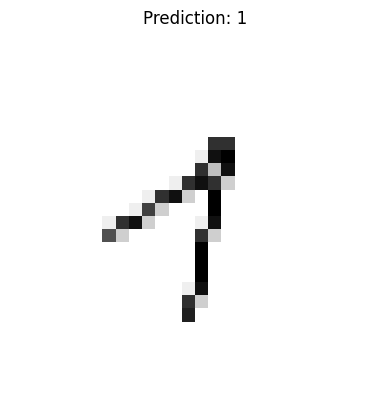

The number is a 1


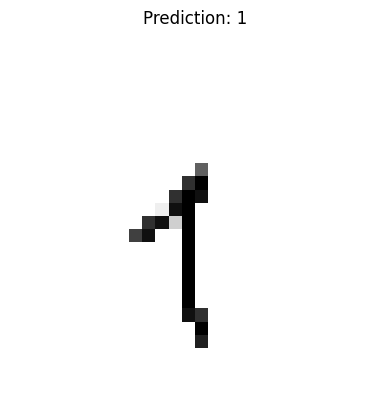

The number is a 7


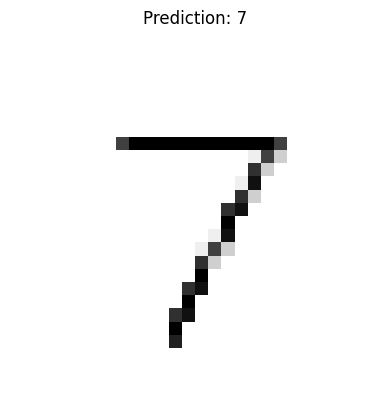

The number is a 7


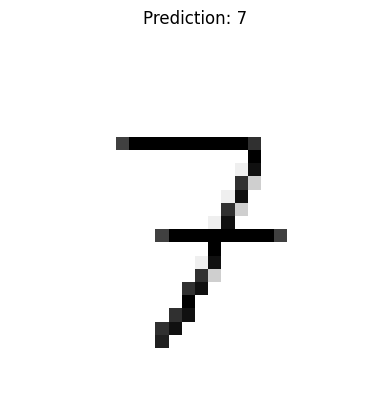

The number is a 0


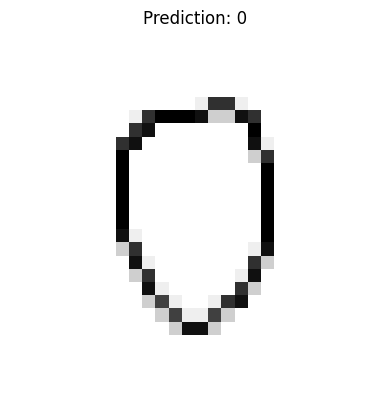

The number is a 0


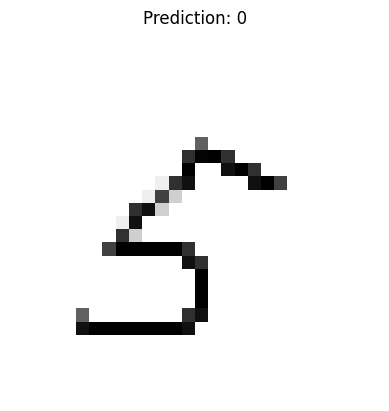

The number is a 3


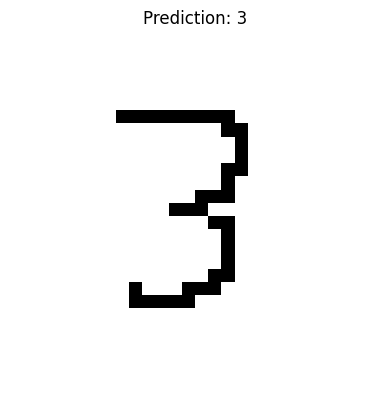

The number is a 2


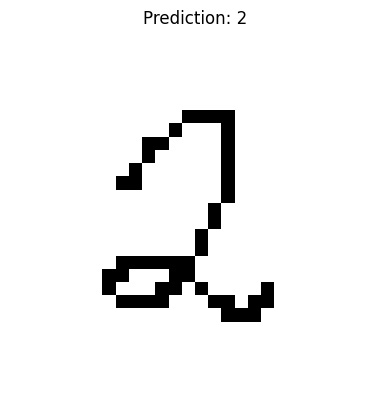

The number is a 1


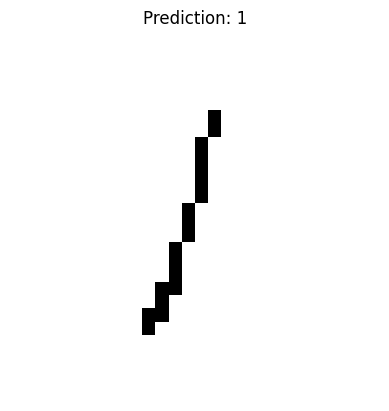

The number is a 0


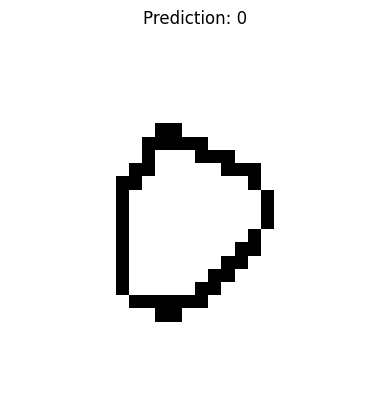

The number is a 1


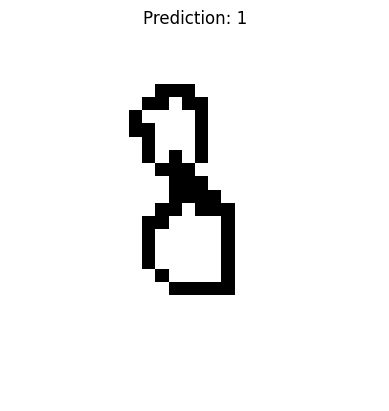

The number is a 7


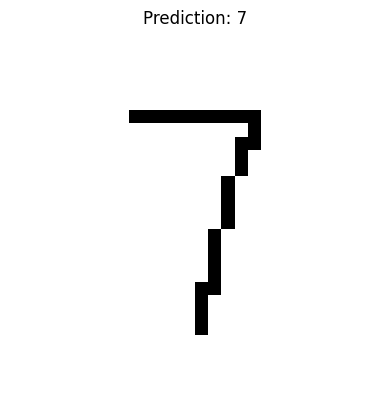

The number is a 4


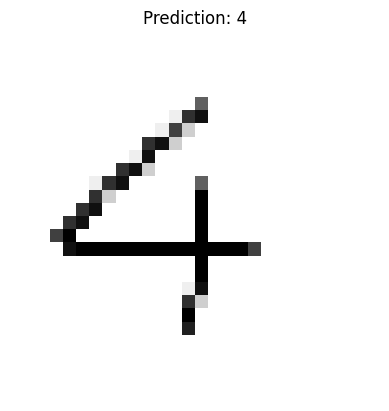

In [5]:
img_index = 1
img_dir = 'digits'

while True:
    img_path = os.path.join(img_dir, f'digit{img_index}.png')
    
    if not os.path.isfile(img_path):
        break

    try:
        # Read image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError(f'Image {img_path} could not be read.')
        
        # Preprocess
        img = np.invert(np.array([img]))  # invert and reshape for prediction
        prediction = model.predict(img, verbose=0)  # disable progress bar
        predicted_digit = np.argmax(prediction)

        print(f'The number is a {predicted_digit}')
        
        # Show image
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.title(f'Prediction: {predicted_digit}')
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f'Error with image {img_path}: {e}')
    
    img_index += 1